# 스타벅스, 메가커피 지역별 입지전략 분석
* 커피브랜드별 입지전략의 차이가 있겠으나 크게 고가 커피브랜드와 저가 커피브랜드의 차이를 발견하고자 상권분석 시도
* 고가 커피브랜드의 상징인 스타벅스와 신흥 저가 커피브랜드의 상징이 된 메가커피의 입지전략 차이가 존재할지 비교분석 해보고자 함

# 필요한 모듈 불러오기

In [2]:
import pandas as pd
import folium
from folium import plugins
import webbrowser

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import json
from pandas.io.json import json_normalize

In [3]:
# plot출력시 경고 문구 삭제
import warnings
warnings.filterwarnings(action='ignore')

In [36]:
df = pd.read_csv('./1차프로젝트 데이터/매장데이터전처리.csv')
df

Unnamed: 0   브랜드       매장명                          주소     지역   시군구  \
0              0  스타벅스   역삼아레나빌딩     서울특별시 강남구 언주로 425 (역삼동)  서울특별시   강남구   
1              1  스타벅스    논현역사거리    서울특별시 강남구 강남대로 538 (논현동)  서울특별시   강남구   
2              2  스타벅스   신사역성일빌딩    서울특별시 강남구 강남대로 584 (논현동)  서울특별시   강남구   
3              3  스타벅스    국기원사거리    서울특별시 강남구 테헤란로 125 (역삼동)  서울특별시   강남구   
4              4  스타벅스    스탈릿대치R  서울특별시 강남구 남부순환로 2947 (대치동)  서울특별시   강남구   
...          ...   ...       ...                         ...    ...   ...   
3136        1527  메가커피       삼양점    서울특별시 강북구 솔샘로 213-2(미아동)     서울   강북구   
3137        1528  메가커피     인천동양점      인천광역시 계양구 동양로 117(동양동)     인천   계양구   
3138        1529  메가커피     구로구청점     서울특별시 구로구 가마산로 268(구로동)     서울   구로구   
3139        1530  메가커피  의정부민락KT점       경기도 의정부시 용현로 154(민락동)     경기  의정부시   
3140        1531  메가커피      간석역점       인천광역시 남동구 석산로 15(간석동)     인천   남동구   

         세부         위도          경도  
0       언주로  37.501087  127.043069  
1      강남대로  37.510178  127.022223  
2      강남대로  37.514132  127.020563  
3      테헤란로  37.499517  127.031495  
4     남부순환로  37.494668  127.062583  
...     ...        ...         ...  
3136    미아동  37.620216  127.016487  
3137    동양동  37.559109  126.757883  
3138    구로동  37.495616  126.890319  
3139    민락동  37.740523  127.093060  
3140    간석동  37.463633  126.695163  

[3141 rows x 9 columns]

# 매장 분포 지도 시각화

In [40]:
from folium.plugins import MarkerCluster

# 지도 시작 지점 -> 비트캠프 강남본원 좌표값으로 설정
lat = '37.499558'
long = '127.028949'

m  = folium.Map([lat, long], zoom_start=16)
mk = MarkerCluster().add_to(m)

try:
    for i in df.index:
        sub_lat = df.loc[i, '위도']
        sub_long = df.loc[i, '경도']   
        title = df.loc[i, '브랜드']

        folium.CircleMarker(
        location=[sub_lat,sub_long],
        fill =True,
        #fill_color = 'yellow',
        fill_opacity =1,
        color = 'orange',
        weight=1,
        radius=3,
        ).add_to(m)
        if df.loc[i, '브랜드'] == '스타벅스':
            folium.CircleMarker(
            location=[sub_lat,sub_long],
            fill =True,
            #fill_color = 'green',
            fill_opacity =1,
            color = 'green',
            weight=1,
            radius=3,
            ).add_to(m)
except:
    pass
m

# 행정구역별 분석활용 데이터 수집 및 전처리

### 지역별 인구수, 종사자수, 사업체수, 시각화를 위한 지역별 대표 위도,경도 데이터 수집 후 병합 

In [22]:
code_df = pd.read_excel('./행정구역데이터/시군구_구분코드.xlsx',sheet_name='서울')

code_df['Code'] = code_df['Code'].astype(object)
code_df

Code   시군구  Population    종사자수   사업체수         위도          경도
0   11110   종로구      145512  260446  39679  37.599100  126.986149
1   11140    중구      122858  392568  60127  37.557945  126.994190
2   11170   용산구      224145  135240  20254  37.531101  126.981074
3   11200   성동구      287820  178243  28343  37.550675  127.040962
4   11215   광진구      341112  126305  24445  37.548144  127.085753
5   11230  동대문구      337846  138400  31324  37.583801  127.050700
6   11260   중랑구      388554  103345  28228  37.595379  127.093967
7   11290   성북구      432628  111005  23617  37.606991  127.023218
8   11305   강북구      300887   73904  19014  37.646995  127.014716
9   11320   도봉구      318718   72939  18628  37.665861  127.031767
10  11350   노원구      513053  116684  26618  37.655264  127.077120
11  11380   은평구      474062   93631  24681  37.617612  126.922700
12  11410  서대문구      306249  113819  20095  37.582037  126.935667
13  11440   마포구      369903  247276  37290  37.562291  126.908780
14  11470   양천구      449010  121582  25894  37.527062  126.856153
15  11500   강서구      575875  257494  39458  37.565762  126.822656
16  11530   구로구      397506  225668  38756  37.495486  126.858121
17  11545   금천구      230644  242686  33814  37.460097  126.900155
18  11560  영등포구      377536  373478  42370  37.520641  126.913924
19  11590   동작구      387117  106159  19793  37.496504  126.944307
20  11620   관악구      488029  115329  25505  37.465399  126.943807
21  11650   서초구      416285  438985  46940  37.476953  127.037810
22  11680   강남구      533359  698840  71027  37.495985  127.066409
23  11710   송파구      659385  341201  48644  37.504853  127.114482
24  11740   강동구      464163  141770  29080  37.549208  127.146482

In [11]:
state_geo = './행정구역데이터/SIG.zip.geojson'
state_geo1 = json.load(open(state_geo, encoding='utf-8'))

### 지역별 매장수 

In [38]:
df_s = pd.read_csv('./1차프로젝트 데이터/매장데이터전처리_스타벅스.csv')
df_m = pd.read_csv('./1차프로젝트 데이터/매장데이터전처리_메가커피.csv')
df_m_count = df_m[df_m['지역']=='서울'].pivot_table(index=['시군구'],values='브랜드',aggfunc='count').rename(columns={'브랜드':'메가커피_매장수'})
df_s_count = df_s[df_s['지역']=='서울특별시'].pivot_table(index=['시군구'],values='브랜드',aggfunc='count').rename(columns={'브랜드':'스타벅스_매장수'})
df_s_count

스타벅스_매장수
시군구           
강남구         87
강동구         16
강북구          6
강서구         21
관악구         11
광진구         16
구로구         12
금천구         11
노원구         13
도봉구          3
동대문구         9
동작구         11
마포구         32
서대문구        20
서초구         48
성동구         11
성북구         14
송파구         34
양천구         17
영등포구        40
용산구         21
은평구          8
종로구         41
중구          56
중랑구          8

### 행정구역 데이터와 매장 개수 데이터 병합

In [23]:
# 지역별 매장이 없는 경우 fillna를 통해 0 부여
newdf = pd.merge(code_df, df_m_count, how = 'left',on = '시군구')
newdf = newdf.fillna(0)
newdf = newdf.drop(index = 0, axis = 0)
newdf

Code   시군구  Population    종사자수   사업체수         위도          경도  메가커피_매장수
1   11140    중구      122858  392568  60127  37.557945  126.994190         7
2   11170   용산구      224145  135240  20254  37.531101  126.981074         6
3   11200   성동구      287820  178243  28343  37.550675  127.040962        13
4   11215   광진구      341112  126305  24445  37.548144  127.085753         8
5   11230  동대문구      337846  138400  31324  37.583801  127.050700        15
6   11260   중랑구      388554  103345  28228  37.595379  127.093967        13
7   11290   성북구      432628  111005  23617  37.606991  127.023218        14
8   11305   강북구      300887   73904  19014  37.646995  127.014716        12
9   11320   도봉구      318718   72939  18628  37.665861  127.031767        12
10  11350   노원구      513053  116684  26618  37.655264  127.077120        15
11  11380   은평구      474062   93631  24681  37.617612  126.922700        16
12  11410  서대문구      306249  113819  20095  37.582037  126.935667        11
13  11440   마포구      369903  247276  37290  37.562291  126.908780        18
14  11470   양천구      449010  121582  25894  37.527062  126.856153        16
15  11500   강서구      575875  257494  39458  37.565762  126.822656        26
16  11530   구로구      397506  225668  38756  37.495486  126.858121        18
17  11545   금천구      230644  242686  33814  37.460097  126.900155        10
18  11560  영등포구      377536  373478  42370  37.520641  126.913924        18
19  11590   동작구      387117  106159  19793  37.496504  126.944307         8
20  11620   관악구      488029  115329  25505  37.465399  126.943807        11
21  11650   서초구      416285  438985  46940  37.476953  127.037810         6
22  11680   강남구      533359  698840  71027  37.495985  127.066409         8
23  11710   송파구      659385  341201  48644  37.504853  127.114482        21
24  11740   강동구      464163  141770  29080  37.549208  127.146482        13

### 브랜드 시군구별 매장수 병합 ( 스타벅스 매장수 추가)

In [24]:
final_merge_df = pd.merge(newdf, df_s_count, how = 'left', on = '시군구')
final_merge_df.fillna(0)

Code   시군구  Population    종사자수   사업체수         위도          경도  메가커피_매장수  \
0   11140    중구      122858  392568  60127  37.557945  126.994190         7   
1   11170   용산구      224145  135240  20254  37.531101  126.981074         6   
2   11200   성동구      287820  178243  28343  37.550675  127.040962        13   
3   11215   광진구      341112  126305  24445  37.548144  127.085753         8   
4   11230  동대문구      337846  138400  31324  37.583801  127.050700        15   
5   11260   중랑구      388554  103345  28228  37.595379  127.093967        13   
6   11290   성북구      432628  111005  23617  37.606991  127.023218        14   
7   11305   강북구      300887   73904  19014  37.646995  127.014716        12   
8   11320   도봉구      318718   72939  18628  37.665861  127.031767        12   
9   11350   노원구      513053  116684  26618  37.655264  127.077120        15   
10  11380   은평구      474062   93631  24681  37.617612  126.922700        16   
11  11410  서대문구      306249  113819  20095  37.582037  126.935667        11   
12  11440   마포구      369903  247276  37290  37.562291  126.908780        18   
13  11470   양천구      449010  121582  25894  37.527062  126.856153        16   
14  11500   강서구      575875  257494  39458  37.565762  126.822656        26   
15  11530   구로구      397506  225668  38756  37.495486  126.858121        18   
16  11545   금천구      230644  242686  33814  37.460097  126.900155        10   
17  11560  영등포구      377536  373478  42370  37.520641  126.913924        18   
18  11590   동작구      387117  106159  19793  37.496504  126.944307         8   
19  11620   관악구      488029  115329  25505  37.465399  126.943807        11   
20  11650   서초구      416285  438985  46940  37.476953  127.037810         6   
21  11680   강남구      533359  698840  71027  37.495985  127.066409         8   
22  11710   송파구      659385  341201  48644  37.504853  127.114482        21   
23  11740   강동구      464163  141770  29080  37.549208  127.146482        13   

    스타벅스_매장수  
0         56  
1         21  
2         11  
3         16  
4          9  
5          8  
6         14  
7          6  
8          3  
9         13  
10         8  
11        20  
12        32  
13        17  
14        21  
15        12  
16        11  
17        40  
18        11  
19        11  
20        48  
21        87  
22        34  
23        16

### * GRDP (gross regional domestic product) : 지역내총생산, 어떤 기간 동안 어떠한 지역에서 생산된 상품과 서비스의 가치를 시장가격으로 평가한 수치
* 지역별 경제적 부가가치에 따른 입지전략을 사용할지 분석을 위해 활용

### GRDP 데이터 로드

In [25]:
grdp_df = pd.read_excel('./행정구역데이터/시군구_구분 GRDP데이터(2017년도 측정).xlsx', sheet_name='서울')
grdp_df

시군구  2017년 GRDP
0    종로구    31416328
1     중구    51213292
2    용산구    11737945
3    성동구    10735112
4    광진구     6131450
5   동대문구     7218027
6    중랑구     4283062
7    성북구     5917636
8    강북구     3057496
9    도봉구     3325320
10   노원구     6239829
11   은평구     4514825
12  서대문구     8212568
13   마포구    18740095
14   양천구     6658836
15   강서구    16772058
16   구로구    13254659
17   금천구    16385145
18  영등포구    32055158
19   동작구     6254375
20   관악구     5755018
21   서초구    33772132
22   강남구    65387478
23   송파구    26815980
24   강동구     8225774

### GRDP 데이터 병합

In [31]:
# 동일 방식으로 병합 후 저장
newdf = pd.read_csv('./1차프로젝트 데이터/시각화 비교활용데이터_서울.csv',encoding='utf-8')
newdf

Unnamed: 0  Unnamed: 0.1   Code   시군구  Population    종사자수   사업체수  \
0            0             0  11680   강남구      533359  698840  71027   
1            1             1  11740   강동구      464163  141770  29080   
2            2             2  11305   강북구      300887   73904  19014   
3            3             3  11500   강서구      575875  257494  39458   
4            4             4  11620   관악구      488029  115329  25505   
5            5             5  11215   광진구      341112  126305  24445   
6            6             6  11530   구로구      397506  225668  38756   
7            7             7  11545   금천구      230644  242686  33814   
8            8             8  11350   노원구      513053  116684  26618   
9            9             9  11320   도봉구      318718   72939  18628   
10          10            10  11230  동대문구      337846  138400  31324   
11          11            11  11590   동작구      387117  106159  19793   
12          12            12  11440   마포구      369903  247276  37290   
13          13            13  11410  서대문구      306249  113819  20095   
14          14            14  11650   서초구      416285  438985  46940   
15          15            15  11200   성동구      287820  178243  28343   
16          16            16  11290   성북구      432628  111005  23617   
17          17            17  11710   송파구      659385  341201  48644   
18          18            18  11470   양천구      449010  121582  25894   
19          19            19  11560  영등포구      377536  373478  42370   
20          20            20  11170   용산구      224145  135240  20254   
21          21            21  11380   은평구      474062   93631  24681   
22          22            22  11110   종로구      145512  260446  39679   
23          23            23  11140    중구      122858  392568  60127   
24          24            24  11260   중랑구      388554  103345  28228   

           위도          경도  스타벅스_매장수  메가커피_매장수  2017년 GRDP  
0   37.495985  127.066409        87         8    65387478  
1   37.549208  127.146482        16        13     8225774  
2   37.646995  127.014716         6        12     3057496  
3   37.565762  126.822656        21        26    16772058  
4   37.465399  126.943807        11        11     5755018  
5   37.548144  127.085753        17         8     6131450  
6   37.495486  126.858121        12        18    13254659  
7   37.460097  126.900155        11        10    16385145  
8   37.655264  127.077120        13        15     6239829  
9   37.665861  127.031767         3        12     3325320  
10  37.583801  127.050700         9        15     7218027  
11  37.496504  126.944307        11         8     6254375  
12  37.562291  126.908780        32        18    18740095  
13  37.582037  126.935667        20        11     8212568  
14  37.476953  127.037810        48         6    33772132  
15  37.550675  127.040962        12        13    10735112  
16  37.606991  127.023218        14        14     5917636  
17  37.504853  127.114482        34        21    26815980  
18  37.527062  126.856153        17        16     6658836  
19  37.520641  126.913924        40        18    32055158  
20  37.531101  126.981074        21         6    11737945  
21  37.617612  126.922700         8        16     4514825  
22  37.599100  126.986149        41         8    31416328  
23  37.557945  126.994190        56         7    51213292  
24  37.595379  127.093967         8        13     4283062

In [33]:
# 지역별 1인당 경제적 부가가치 창출 판단
# 기존 1인당 GRDP는 GRDP대비 지역 인구수로 판단하나 부가가치 생산자의 관점으로 종사자수로 나눔
newdf['1인당 GRDP'] = newdf['2017년 GRDP']/newdf['종사자수']
newdf

Unnamed: 0  Unnamed: 0.1   Code   시군구  Population    종사자수   사업체수  \
0            0             0  11680   강남구      533359  698840  71027   
1            1             1  11740   강동구      464163  141770  29080   
2            2             2  11305   강북구      300887   73904  19014   
3            3             3  11500   강서구      575875  257494  39458   
4            4             4  11620   관악구      488029  115329  25505   
5            5             5  11215   광진구      341112  126305  24445   
6            6             6  11530   구로구      397506  225668  38756   
7            7             7  11545   금천구      230644  242686  33814   
8            8             8  11350   노원구      513053  116684  26618   
9            9             9  11320   도봉구      318718   72939  18628   
10          10            10  11230  동대문구      337846  138400  31324   
11          11            11  11590   동작구      387117  106159  19793   
12          12            12  11440   마포구      369903  247276  37290   
13          13            13  11410  서대문구      306249  113819  20095   
14          14            14  11650   서초구      416285  438985  46940   
15          15            15  11200   성동구      287820  178243  28343   
16          16            16  11290   성북구      432628  111005  23617   
17          17            17  11710   송파구      659385  341201  48644   
18          18            18  11470   양천구      449010  121582  25894   
19          19            19  11560  영등포구      377536  373478  42370   
20          20            20  11170   용산구      224145  135240  20254   
21          21            21  11380   은평구      474062   93631  24681   
22          22            22  11110   종로구      145512  260446  39679   
23          23            23  11140    중구      122858  392568  60127   
24          24            24  11260   중랑구      388554  103345  28228   

           위도          경도  스타벅스_매장수  메가커피_매장수  2017년 GRDP    1인당 GRDP  
0   37.495985  127.066409        87         8    65387478   93.565735  
1   37.549208  127.146482        16        13     8225774   58.021965  
2   37.646995  127.014716         6        12     3057496   41.371184  
3   37.565762  126.822656        21        26    16772058   65.135724  
4   37.465399  126.943807        11        11     5755018   49.900875  
5   37.548144  127.085753        17         8     6131450   48.544792  
6   37.495486  126.858121        12        18    13254659   58.735217  
7   37.460097  126.900155        11        10    16385145   67.515823  
8   37.655264  127.077120        13        15     6239829   53.476304  
9   37.665861  127.031767         3        12     3325320   45.590425  
10  37.583801  127.050700         9        15     7218027   52.153374  
11  37.496504  126.944307        11         8     6254375   58.915165  
12  37.562291  126.908780        32        18    18740095   75.786146  
13  37.582037  126.935667        20        11     8212568   72.154631  
14  37.476953  127.037810        48         6    33772132   76.932314  
15  37.550675  127.040962        12        13    10735112   60.227397  
16  37.606991  127.023218        14        14     5917636   53.309635  
17  37.504853  127.114482        34        21    26815980   78.592912  
18  37.527062  126.856153        17        16     6658836   54.768272  
19  37.520641  126.913924        40        18    32055158   85.828772  
20  37.531101  126.981074        21         6    11737945   86.793441  
21  37.617612  126.922700         8        16     4514825   48.219340  
22  37.599100  126.986149        41         8    31416328  120.625112  
23  37.557945  126.994190        56         7    51213292  130.457123  
24  37.595379  127.093967         8        13     4283062   41.444308

# 상관분석 활용요인 데이터 전처리

In [34]:
analy_df = newdf[['Population','종사자수','사업체수','스타벅스_매장수','메가커피_매장수','2017년 GRDP','1인당 GRDP']]
analy_df

Population    종사자수   사업체수  스타벅스_매장수  메가커피_매장수  2017년 GRDP    1인당 GRDP
0       533359  698840  71027        87         8    65387478   93.565735
1       464163  141770  29080        16        13     8225774   58.021965
2       300887   73904  19014         6        12     3057496   41.371184
3       575875  257494  39458        21        26    16772058   65.135724
4       488029  115329  25505        11        11     5755018   49.900875
5       341112  126305  24445        17         8     6131450   48.544792
6       397506  225668  38756        12        18    13254659   58.735217
7       230644  242686  33814        11        10    16385145   67.515823
8       513053  116684  26618        13        15     6239829   53.476304
9       318718   72939  18628         3        12     3325320   45.590425
10      337846  138400  31324         9        15     7218027   52.153374
11      387117  106159  19793        11         8     6254375   58.915165
12      369903  247276  37290        32        18    18740095   75.786146
13      306249  113819  20095        20        11     8212568   72.154631
14      416285  438985  46940        48         6    33772132   76.932314
15      287820  178243  28343        12        13    10735112   60.227397
16      432628  111005  23617        14        14     5917636   53.309635
17      659385  341201  48644        34        21    26815980   78.592912
18      449010  121582  25894        17        16     6658836   54.768272
19      377536  373478  42370        40        18    32055158   85.828772
20      224145  135240  20254        21         6    11737945   86.793441
21      474062   93631  24681         8        16     4514825   48.219340
22      145512  260446  39679        41         8    31416328  120.625112
23      122858  392568  60127        56         7    51213292  130.457123
24      388554  103345  28228         8        13     4283062   41.444308

In [35]:
# 상관분석
corr = df.corr(method = 'pearson')
corr

Population      종사자수      사업체수  스타벅스_매장수  메가커피_매장수  2017년 GRDP  \
Population    1.000000  0.133538  0.129029  0.023515  0.594610   -0.054896   
종사자수          0.133538  1.000000  0.950647  0.936927 -0.095949    0.958604   
사업체수          0.129029  0.950647  1.000000  0.891176  0.009667    0.944901   
스타벅스_매장수      0.023515  0.936927  0.891176  1.000000 -0.243938    0.967706   
메가커피_매장수      0.594610 -0.095949  0.009667 -0.243938  1.000000   -0.214190   
2017년 GRDP   -0.054896  0.958604  0.944901  0.967706 -0.214190    1.000000   
1인당 GRDP     -0.525903  0.543432  0.652569  0.649466 -0.362728    0.741452   

            1인당 GRDP  
Population -0.525903  
종사자수        0.543432  
사업체수        0.652569  
스타벅스_매장수    0.649466  
메가커피_매장수   -0.362728  
2017년 GRDP  0.741452  
1인당 GRDP    1.000000

In [9]:
# matplotlib 한글사용 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 상관분석
* 위와 같은 전처리 방식으로 전국을 분석하기에 어려움이 있어 수도권(서울,경기,인천)을 중심으로 분석하고자 함

### 서울 상관분석

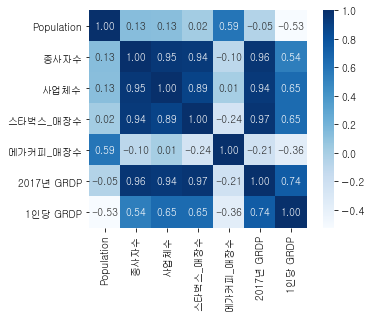

In [39]:
df_heatmap_seoul = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10},
                               fmt = '.2f', square = True, cmap = 'Blues')

* 상관분석 결과 해석(서울)
        스타벅스는 GRDP가 높은 지역에 맞추어 매장을 늘리는 경향이 뚜렷(서울 종사자수 기준 0.94, GRDP기준 0.97)
        -> 경제적 부가가치가 높은 지역에 그만큼 입지하는 성향으로 해석
        반면, 메가커피는 인구를 기반으로 입지하는 경향(인구 기준 0.59) => 서로 확연히 다른 입지전략 사용으로 분석

### 경기도 상관분석

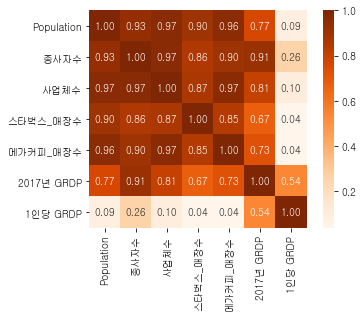

In [86]:
df_heatmap_kyungki = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Oranges')

* 상관분석 결과 해석(경기)
        스타벅스,메가커피 모두 인구,종사자 수가 많은 지역에 매장이 입점하려는 경향을 보임
        -> (인구,종사자 기준 모두 0.86 이상의 높은 상관성)

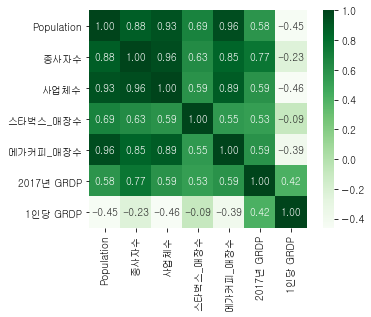

In [125]:
df_heatmap_incheon = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Greens')

* 상관분석 결과 해석(인천)
        스타벅스,메가커피 모두 인구,종사자 수가 많은 지역에 매장이 입점하려는 경향을 보임
        -> (인구,종사자 기준 모두 0.63 이상의 양의 상관성, 특히 메가커피가 강함)

## 상관분석 결론
        스타벅스는 서울에서 경제적 부가가치가 높은 지역일수록 입점하려는 강한 성향
        * 이외 지역의 경우, 종사자수 대비 매장 수에서 항상 높은 상관성을 보임
        -> 직장인 대상 입지 전략을 주로 추구하는 것으로 분석 
        메가커피는 서울에서 지역인구수 를 고려해 입점하는 경향을 보임
        * 이외 지역의 경우, 인구수, 종사자수 대비 매장 수에서 매우 강한 상관성을 보임
        -> 지역 인구를 기반으로 입지전략을 추구하는 것으로 분석

* 지역별, 상권별 입지 전략을 세부적으로 진행한다는 가맹본부 인터뷰를 보아 입지 전략의 일반화는 어려울 것으로 판단
* 세부적으로 진행하기에도 현실적인 어려움이 존재하여 고가 브랜드의 상징인 스타벅스와 메가커피 대략적인 전략을 파악한 것으로 분석종료